<a href="https://colab.research.google.com/github/surajjorwar/ml/blob/main/PCA_OF_MNST_DATA_computation_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ml files/100-days-of-machine-learning-main/day47-pca/pca/train.csv')

In [5]:
#image consist of 28*28 pixels and every pixel is a column  = 784
df.shape

(42000, 785)

In [6]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#here lable is the number of an image
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
15835,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt


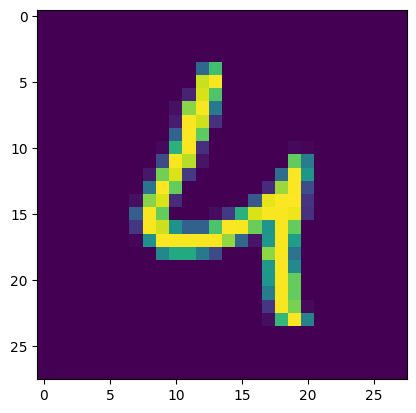

In [9]:
plt.imshow(df.iloc[25180,1:].values.reshape(28,28))

In [10]:
x= df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [13]:
x_train.shape

(33600, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
# due to high dimentional data this process will need to many computational power and time to run
# to reduce this we use PCA
y_pred = knn.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9648809523809524

# **now we will use PCA**

In [19]:
#step 1 scaling
from sklearn.preprocessing import StandardScaler
scalar  = StandardScaler()

In [20]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [21]:
#PCA ---> n_components no of principle components if none then it takes n = no of column
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [22]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [23]:
#whe have taken best 100 Principle Component
x_train_trf.shape

(33600, 200)

In [24]:
knn = KNeighborsClassifier()

In [25]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(x_test_trf)

In [27]:
accuracy_score(y_pred,y_test)

0.9510714285714286

In [ ]:
#checking accuracy for each principal component

for i in range(1,50):
  pca = PCA(n_components = i)
  x_train_trf = pca.fit_transform(x_train)
  x_test_trf = pca.transform(x_test)

  knn = KNeighborsClassifier()
  knn.fit(x_train_trf,y_train)

  y_pred = knn.predict(x_test_trf)

  print(accuracy_score(y_pred,y_test))




In [30]:
#transforming to a 2D coordinate system and visualizing it
pca = PCA(n_components = 2)

In [32]:
x_train_trf1 = pca.fit_transform(x_train)
x_test_trf1 = pca.transform(x_test)

In [33]:
import plotly.express as px

In [37]:
y_train_trf1 = y_train.astype(str)
fig = px.scatter(x = x_train_trf1[:,0],
                 y=x_train_trf1[:,1],
                 color = y_train_trf1,
                 color_discrete_sequence = px.colors.qualitative.G10

                 )
fig.show()

In [ ]:
##transforming to a 3D coordinate system

In [38]:
pca = PCA(n_components = 3)

In [39]:
x_train_trf2 = pca.fit_transform(x_train)
x_test_trf2 = pca.transform(x_test)

In [55]:
y_train_trf2 = y_train.astype(str)
fig = px.scatter_3d(df,x = x_train_trf2[:,0],
                 y=x_train_trf2[:,1],
                 z=x_train_trf2[:,2],
                 color = y_train_trf2,
                 color_discrete_sequence = px.colors.qualitative.G10

                 )
fig.show()

In [46]:
#eigen values
pca.explained_variance_

array([40.67111197, 29.17023385, 26.74459568])

In [48]:
#eigen vectors
pca.components_

array([[ 1.51259933e-17, -1.88889709e-18, -7.44978205e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-8.35647204e-17,  2.35646801e-17,  9.48872028e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.00454404e-18, -5.35328949e-17, -1.88183182e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [ ]:
# finding optimum no of principal components to gain 90+ accuracy

In [49]:
#shows the percent contribution  of varience in original data  its 12%
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [51]:

pca = PCA(n_components = None)

In [52]:
x_train_trf3 = pca.fit_transform(x_train)
x_test_trf3 = pca.transform(x_test)

In [54]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [53]:
np.cumsum(pca.explained_variance_ratio_) #it combines explained_variance_ratio_ and adds each time

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

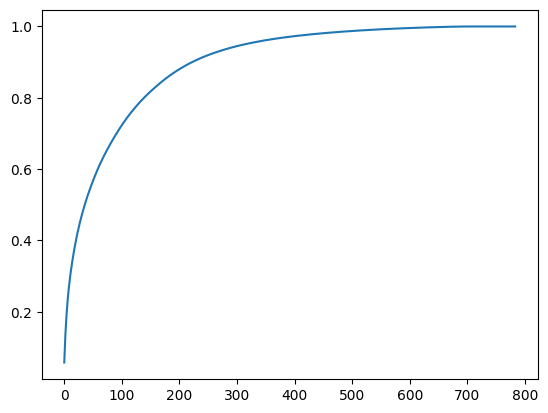

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# y axis = varience
#y axis = no of components
# by observing this plot we can say that 90 % varience is explained near 200 components

In [ ]:
#pca cannot be used in 3 main cenarios
# 1  - when data is in circular form deom the mean distance from x y z is same
# 2 - when projected  the data points overlaps in such a way they we are not able to differentiate it
# 3 - whn data contains a pattern such as  sin curve or y = x**x when these data are  projected
#     they lost their true nature and its not that useful